In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

In [3]:
elos=pd.read_csv(r'C:\Users\Asus\PredictingRatings\data\clean_elos.csv')
#elos=pd.read_csv(r'C:\Users\vznam\Downloads\PredictingRatings-master\data\clean_elos.csv')
elos.head()

,WhiteElo,BlackElo,MeanElos,DiffElos,SumElos,Class
0,2354,2411,2382,-57,4765,master
1,1915,1999,1957,-84,3914,novice
2,2446,2191,2318,255,4637,master
3,2168,2075,2121,93,4243,average
4,2437,2254,2345,183,4691,master


In [5]:
features=pd.read_csv(r'C:\Users\Asus\PredictingRatings\data\features.csv')
#features=pd.read_csv(r'C:\Users\vznam\Downloads\PredictingRatings-master\data\features.csv')

print(features.info())
print(features.shape)
features.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24255 entries, 0 to 24254
Columns: 233 entries, Result to InsufficientMaterial
dtypes: float64(111), int64(122)
memory usage: 43.1 MB
None
(24255, 233)


,Result,NumMoves,MeanScore,ModeScore,FinalScore,FullMoves,MinScore,MaxScore,MedianScore,StdScore,...,EndB,EndR,EndK,WhiteСhecks,WhiteQueenCastle,BlackQueenCastle,Promotion,EnPassant,CanClaimDraw,InsufficientMaterial
count,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,...,24255.000000,24255.00000,24255.0,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000
mean,0.544877,42.252690,30.881103,11.907442,111.901711,83.967223,-794.591878,988.643950,68.913894,314.678490,...,0.631293,1.03892,1.0,2.015584,1.457308,0.910740,0.064069,0.061637,0.035415,0.000783
std,0.417736,16.235593,233.709202,445.214702,2310.851869,32.489872,2126.099646,2275.840558,64.170646,475.478471,...,0.676858,0.74847,0.0,2.874868,4.179615,3.663225,0.291749,0.245589,0.184831,0.027978
min,0.000000,10.000000,-2162.262500,-11447.000000,-12261.000000,19.000000,-12348.000000,-51.000000,0.000000,7.795716,...,0.000000,0.00000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,31.000000,-60.758665,0.000000,-362.000000,61.000000,-482.000000,67.000000,30.000000,61.336328,...,0.000000,0.00000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,40.000000,24.563636,0.000000,0.000000,79.000000,-75.000000,156.000000,49.000000,145.621548,...,1.000000,1.00000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,51.000000,123.987715,26.000000,546.500000,102.000000,-18.000000,700.000000,84.000000,291.317992,...,1.000000,2.00000,1.0,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,165.000000,2073.289256,11259.000000,12337.000000,329.000000,26.000000,12352.000000,784.000000,3962.575036,...,2.000000,2.00000,1.0,71.000000,35.000000,36.000000,4.000000,2.000000,1.000000,1.000000


#### Поиск пропущенных значений

In [6]:
from sklearn.impute import MissingIndicator

indicator = MissingIndicator(missing_values=np.NaN)
indicator = indicator.fit_transform(features)

indicator

array([], shape=(24255, 0), dtype=bool)

In [7]:
features.isnull().values.any()

False

#### Стандартизация
Стандартизация - это преобразование, которое центрирует данные путем удаления среднего значения каждого объекта, а затем масштабирует его путем деления (непостоянных) объектов на их стандартное отклонение . После стандартизации данных среднее значение будет равно нулю, а стандартное отклонение - одному.

Стандартизация может кардинально улучшить производительность моделей. Например, многие элементы, используемые в целевой функции алгоритма обучения (например, ядро RBF машин опорных векторов или регуляризаторы l1 и l2 линейных моделей), предполагают, что все объекты сосредоточены вокруг нуля и имеют дисперсию в том же порядке. Если у признака есть отклонение, которое на несколько порядков больше, чем у других, оно может доминировать в целевой функции и сделать оценщика неспособным учиться на других признаках правильно, как ожидалось.

В зависимости от ваших потребностей и данных, Sklearn предоставляет набор инструментов для масштабирования : StandardScaler , MinMaxScaler , MaxAbsScaler и RobustScaler .

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
fscale=scaler.fit_transform(features)

In [9]:
len(fscale), len(fscale[0])

(24255, 233)

In [10]:
fscale[:5]

array([[-1.07432180e-01, -1.43223410e+00, -2.96688240e-02, ...,
        -2.50980631e-01, -1.91613355e-01, -2.79992455e-02],
       [-1.30438557e+00,  6.61973456e-01, -3.09399080e+00, ...,
        -2.50980631e-01, -1.91613355e-01, -2.79992455e-02],
       [ 1.08952121e+00, -2.00347304e-01,  7.85849638e-02, ...,
        -2.50980631e-01, -1.91613355e-01, -2.79992455e-02],
       [ 1.08952121e+00, -1.06266806e+00,  1.17738362e+00, ...,
        -2.50980631e-01, -1.91613355e-01, -2.79992455e-02],
       [-1.07432180e-01, -8.16290704e-01, -2.28992123e-04, ...,
        -2.50980631e-01, -1.91613355e-01, -2.79992455e-02]])

In [11]:
features_scale = pd.DataFrame(fscale)
features_scale.head()

,0,1,2,3,4,5,6,7,8,9,...,223,224,225,226,227,228,229,230,231,232
0,-0.107432,-1.432234,-0.029669,-0.020007,-0.025057,-1.414846,0.361511,-0.402340,-0.754471,-0.606237,...,0.544745,1.284087,0.0,-0.701119,-0.348678,-0.248622,-0.219609,-0.250981,-0.191613,-0.027999
1,-1.304386,0.661973,-3.093991,0.013685,-5.044089,0.678157,-5.056033,-0.393552,-0.092161,4.146337,...,-0.932700,-0.052000,0.0,0.690277,-0.348678,-0.248622,-0.219609,-0.250981,-0.191613,-0.027999
2,1.089521,-0.200347,0.078585,0.042885,0.036394,-0.214447,0.359629,-0.347415,-0.497339,-0.553461,...,-0.932700,-0.052000,0.0,-0.353270,-0.348678,-0.248622,-0.219609,-0.250981,-0.191613,-0.027999
3,1.089521,-1.062668,1.177384,0.013685,0.330231,-1.076272,0.378443,-0.031481,1.138957,-0.002976,...,2.022190,1.284087,0.0,-0.701119,-0.348678,-0.248622,-0.219609,-0.250981,-0.191613,-0.027999
4,-0.107432,-0.816291,-0.000229,0.013685,-0.053186,-0.799257,0.366685,-0.393113,-0.622009,-0.609573,...,-0.932700,-0.052000,0.0,-0.701119,-0.348678,-0.248622,-0.219609,-0.250981,-0.191613,-0.027999


In [12]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler(quantile_range = (0.1,0.9))
frobust=robust.fit_transform(features)

In [13]:
len(frobust), len(frobust[0])

(24255, 233)

In [14]:
frobust[:5]

array([[ 0.00000000e+00, -7.00000000e+00, -9.36157950e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.00000000e-01,  4.33333333e+00, -1.08881570e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.00000000e-01, -3.33333333e-01,  3.74955348e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.00000000e-01, -5.00000000e+00,  4.27585278e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -3.66666667e+00,  9.51541698e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [15]:
features_robust = pd.DataFrame(frobust)
features_robust.head()

,0,1,2,3,4,5,6,7,8,9,...,223,224,225,226,227,228,229,230,231,232
0,0.0,-7.000000,-0.000936,0.000616,0.041667,-6.833333,0.056813,-4.677110,-4.471991,-28.719548,...,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.5,4.333333,-1.088816,0.003694,-8.907517,4.500000,-13.297761,-3.550096,2.196768,515.768981,...,-1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,-0.333333,0.037496,0.006362,0.151236,-0.333333,0.052175,2.366731,-1.882944,-22.673115,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.5,-5.000000,0.427585,0.003694,0.675163,-5.000000,0.098553,42.882903,14.592813,40.394373,...,1.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-3.666667,0.009515,0.003694,-0.008488,-3.500000,0.069567,-3.493745,-3.138239,-29.101647,...,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
fminmax=minmax.fit_transform(features)

In [17]:
fminmax[:5]

array([[0.5       , 0.05806452, 0.51615704, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.27741935, 0.34707742, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.18709677, 0.52213015, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.09677419, 0.58275839, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.12258065, 0.51778144, ..., 0.        , 0.        ,
        0.        ]])

In [16]:
features_minmax = pd.DataFrame(fminmax)
features_minmax.head()

,0,1,2,3,4,5,6,7,8,9,...,223,224,225,226,227,228,229,230,231,232
0,0.5,0.058065,0.516157,0.504272,0.500650,0.061290,0.995798,0.009998,0.026148,0.004712,...,0.5,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.277419,0.347077,0.504933,0.029149,0.280645,0.064975,0.011610,0.080357,0.576097,...,0.0,0.5,0.0,0.056338,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.187097,0.522130,0.505505,0.506423,0.187097,0.995474,0.020076,0.047194,0.011057,...,0.0,0.5,0.0,0.014085,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.096774,0.582758,0.504933,0.534027,0.096774,0.998707,0.078046,0.181122,0.077240,...,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,0.122581,0.517781,0.504933,0.498008,0.125806,0.996687,0.011691,0.036990,0.004311,...,0.0,0.5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


#### Нормализация
Нормализация - это процесс масштабирования отдельных образцов для получения единичной нормы . В основных терминах вам необходимо нормализовать данные, когда алгоритм прогнозирует на основе взвешенных отношений, сформированных между точками данных. Масштабирование входных данных в единичные нормы является обычной операцией для классификации или кластеризации текста .

Одно из ключевых различий между масштабированием (например, стандартизацией) и нормализацией заключается в том, что нормализация является построчной операцией , в то время как масштабирование является столбцовой операцией.
Хотя существует много других способов нормализации данных, sklearn предоставляет три нормы (значение, с которым сравниваются отдельные значения): l1 , l2 и макс . При создании нового экземпляра класса Normalizer вы можете указать желаемую норму в параметре norm .

Ниже формула для имеющихся норм обсуждаются и реализуются в коде Python - где результат представляет собой список знаменателей для каждого образца набора данных X  .

In [18]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
fnorm=normalizer.fit_transform(features)

In [19]:
features_norm = pd.DataFrame(fnorm)
features_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,223,224,225,226,227,228,229,230,231,232
0,0.000281,0.010694,0.013478,0.001689,0.030393,0.021388,-0.014634,0.041087,0.011538,0.014877,...,0.000563,1.125676e-03,5.628378e-04,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000003,-0.000042,0.000001,-0.000707,0.000006,-0.000707,0.000006,0.000004,0.000140,...,0.000000,6.121344e-08,6.121344e-08,2.448538e-07,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000127,0.004959,0.006262,0.003942,0.024921,0.009790,-0.003814,0.025176,0.004705,0.006551,...,0.000000,1.271491e-04,1.271491e-04,1.271491e-04,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000006,0.000143,0.001751,0.000103,0.005005,0.000280,0.000057,0.005245,0.000812,0.001792,...,0.000011,1.143992e-05,5.719961e-06,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000218,0.012648,0.013445,0.007850,-0.004797,0.025296,-0.006542,0.040997,0.012648,0.010836,...,0.000000,4.361357e-04,4.361357e-04,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0


#### mutual_info_regression
Оценивает взаимную информацию для непрерывной целевой переменной.

Взаимная информация (MI)  между двумя случайными переменными является неотрицательным значением, которое измеряет зависимость между переменными. Она равен нулю тогда и только тогда, когда две случайные переменные являются независимыми, а более высокие значения означают более высокую зависимость.

Функция основана на непараметрических методах, основанных на оценке энтропии по расстояниям k-ближайших соседей.

In [21]:
from sklearn.feature_selection import mutual_info_regression

mutual_info=mutual_info_regression(features,elos.SumElos)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [22]:
print(len(mutual_info))
mutual_info

233


array([0.01144929, 0.0074461 , 0.02354213, 0.01343421, 0.02500307,
       0.00979916, 0.00939231, 0.00767176, 0.03364565, 0.03353404,
       0.0342469 , 0.00662867, 0.01337795, 0.02781061, 0.02156062,
       0.03001329, 0.02657642, 0.01531805, 0.02755646, 0.01260773,
       0.        , 0.02920756, 0.02934639, 0.02792328, 0.03281694,
       0.02164038, 0.02747721, 0.02596771, 0.02488595, 0.01929532,
       0.03208715, 0.0430293 , 0.03937981, 0.0121913 , 0.01151433,
       0.0261361 , 0.0282812 , 0.02733352, 0.02442344, 0.03495535,
       0.01784161, 0.02728654, 0.00334934, 0.03468696, 0.0347202 ,
       0.02005031, 0.01705049, 0.00558312, 0.00702134, 0.02013665,
       0.00621245, 0.00718467, 0.01036591, 0.01234481, 0.        ,
       0.02577642, 0.03634354, 0.02152702, 0.02304255, 0.04149552,
       0.02959531, 0.02520405, 0.02376031, 0.01812476, 0.02896865,
       0.02763978, 0.02928624, 0.0250804 , 0.02121925, 0.02263335,
       0.02477367, 0.02966116, 0.03338042, 0.01910373, 0.02025

In [31]:
def get_dependency(info):
    for ind,val in enumerate(info):
        if val > 0.5:
            print(ind)

In [24]:
mutual_info_mean=mutual_info_regression(features,elos.MeanElos)
print(len(mutual_info_mean))
mutual_info_mean

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


233


array([0.01658198, 0.01039483, 0.02194736, 0.01149659, 0.02289977,
       0.00786855, 0.01212491, 0.00526847, 0.03503934, 0.02911937,
       0.03562077, 0.00819085, 0.0109332 , 0.02725668, 0.02325845,
       0.02965184, 0.0301473 , 0.01946948, 0.02685086, 0.01646823,
       0.        , 0.02591258, 0.02723816, 0.02748008, 0.0289034 ,
       0.02441105, 0.02946009, 0.02551394, 0.0297602 , 0.02209971,
       0.03465052, 0.04327108, 0.04480094, 0.00982754, 0.00966432,
       0.0326526 , 0.02780023, 0.02821425, 0.02453801, 0.02699022,
       0.01804713, 0.02564503, 0.00413503, 0.03534215, 0.03303127,
       0.02008609, 0.01771829, 0.00626337, 0.0046899 , 0.02362236,
       0.00536385, 0.00452332, 0.01027122, 0.01346936, 0.        ,
       0.0233709 , 0.03661452, 0.02076567, 0.02188074, 0.03890365,
       0.04012029, 0.022122  , 0.02731584, 0.01800073, 0.02690955,
       0.02816431, 0.03057426, 0.0203961 , 0.02243416, 0.02521578,
       0.0228462 , 0.02849831, 0.03507206, 0.02320153, 0.01305

In [25]:
mutual_info_diff=mutual_info_regression(features,elos.DiffElos)
print(len(mutual_info_diff))
mutual_info_diff

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


233


array([1.90156218e-01, 1.39717538e-02, 1.51834660e-01, 4.80450273e-02,
       1.70169120e-01, 8.20388768e-02, 1.19406066e-01, 1.28169254e-01,
       1.46024411e-02, 2.38521773e-02, 2.80158316e-02, 1.25318138e-01,
       1.22360509e-01, 1.50667056e-01, 1.45227360e-02, 2.15881938e-02,
       2.46556532e-02, 5.02003839e-02, 1.72382150e-01, 1.36611882e-01,
       1.22229860e-01, 1.58154374e-01, 1.86074261e-02, 2.28008937e-02,
       2.64011836e-02, 4.79306125e-02, 1.71709666e-01, 2.37174386e-02,
       3.81701561e-02, 1.66330530e-01, 3.16178115e-02, 1.98015392e-02,
       1.72820078e-02, 0.00000000e+00, 1.10329215e-02, 4.36113736e-02,
       4.86305439e-02, 2.21158222e-02, 3.71859174e-02, 2.87077983e-02,
       1.11453146e-02, 2.91952325e-02, 9.29700176e-03, 3.99033664e-02,
       1.74051316e-02, 2.56417125e-02, 2.48205869e-02, 7.57342767e-03,
       1.32023315e-02, 6.98521474e-03, 0.00000000e+00, 2.58656080e-03,
       1.20132414e-02, 5.47539892e-03, 1.01593979e-02, 6.14037066e-02,
      

In [32]:
print('SumElos')
get_dependency(mutual_info)
print('MeanElos')
get_dependency(mutual_info_mean)
print('DiffElos')
get_dependency(mutual_info_diff)

SumElos
MeanElos
DiffElos


#### f-regression
Одномерные линейные регрессионные тесты.

Линейная модель для тестирования индивидуального эффекта каждого из множества регрессоров. Эта функция оценки используется в процедуре выбора функции, а не в процедуре выбора отдельно стоящей функции.

2 этапа:

1. Вычисляется корреляция между каждым регрессором и целью
2. Она преобразуется в F-оценку, а затем в р-значение.

In [39]:
from sklearn.feature_selection import f_regression

pval_mean=f_regression(features,elos.MeanElos)[1]
pval_sum=f_regression(features,elos.SumElos)[1]
pval_diff=f_regression(features,elos.DiffElos)[1]
pval_white=f_regression(features,elos.WhiteElo)[1]
pval_black=f_regression(features,elos.BlackElo)[1]

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\feature_selection\univariate_selection.py:303: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\_dis

#### проверка коэффициентов регрессии

Вычисление индексов тех признаков, у которых p_value > 0.05, то есть они вероятно являются незначимыми

In [78]:
def get_significance(pvals):
    res=[]
    for ind,val in enumerate(pvals):
        if val >= 0.05:
            res.append(ind)
    return res

In [79]:
print('MeanElos')
ind_rej_mean=get_significance(pval_mean)
print(len(ind_rej_mean))
print('SumElos')
ind_rej_sum=get_significance(pval_sum)
print(len(ind_rej_sum))
print('DiffElos')
ind_rej_diff=get_significance(pval_diff)
print(len(ind_rej_diff))
print('WhiteElos')
ind_rej_white=get_significance(pval_white)
print(len(ind_rej_white))
print('BlackElos')
ind_rej_black=get_significance(pval_black)
print(len(ind_rej_black))

MeanElos
33
SumElos
33
DiffElos
60
WhiteElos
19
BlackElos
13


In [80]:
features.columns

Index(['Result', 'NumMoves', 'MeanScore', 'ModeScore', 'FinalScore',
       'FullMoves', 'MinScore', 'MaxScore', 'MedianScore', 'StdScore',
       ...
       'EndB', 'EndR', 'EndK', 'WhiteСhecks', 'WhiteQueenCastle',
       'BlackQueenCastle', 'Promotion', 'EnPassant', 'CanClaimDraw',
       'InsufficientMaterial'],
      dtype='object', length=233)

In [81]:
for ind,val in enumerate(ind_rej_sum):
    print(features.columns[val])

Result
MeanScore
ModeScore
FinalScore
MeanWhiteScore
ModeWhiteScore
FinalWhiteScore
FinalBlackScore
MeanDeltaScore
MeanDebScore
ModeDebScore
MeanEndScore
ModeEndScore
MeanWhiteEndScore
ModeWhiteEndScore
FinalWhiteEndScore
ModeBlackEndScore
FinalBlackEndScore
ModeDebDeltaScore
ModeMitDeltaScore
ModeEndDeltaScore
MinWhiteDebDeltaScore
MinWhiteMitDeltaScore
MaxBlackMitDeltaScore
VarianceBlackMitDeltaScore
IsFirstAdvantageRealised
IndWhiteBlunder
WhiteKingCastle
MovesBlackAdvantage
Endn
EndB
WhiteQueenCastle
InsufficientMaterial


In [82]:
for ind,val in enumerate(ind_rej_mean):
    print(features.columns[val])

Result
MeanScore
ModeScore
FinalScore
MeanWhiteScore
ModeWhiteScore
FinalWhiteScore
FinalBlackScore
MeanDeltaScore
MeanDebScore
ModeDebScore
MeanEndScore
ModeEndScore
MeanWhiteEndScore
ModeWhiteEndScore
FinalWhiteEndScore
ModeBlackEndScore
FinalBlackEndScore
ModeDebDeltaScore
ModeMitDeltaScore
ModeEndDeltaScore
MinWhiteDebDeltaScore
MinWhiteMitDeltaScore
MaxBlackMitDeltaScore
VarianceBlackMitDeltaScore
IsFirstAdvantageRealised
IndWhiteBlunder
WhiteKingCastle
MovesBlackAdvantage
Endn
EndB
WhiteQueenCastle
InsufficientMaterial


In [83]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn import model_selection as ms
from scipy.stats import pearsonr

from warnings import simplefilter

rand_st=4
#simplefilter("ignore") 

In [84]:
target_white=elos['WhiteElo']
target_black=elos['BlackElo']
target_mean=elos['MeanElos']
target_diff=elos['DiffElos']
target_sum=elos['SumElos']

#### Baseline до удаления незначимых признаков

In [85]:
start10 = time.time()
lr_10 = LinearRegression()
lr_10.fit(features, target_sum)
sum_pred = lr_10.predict(features)
full_time10=round(time.time() - start10,3)
print(full_time10, 'c')

0.24 c


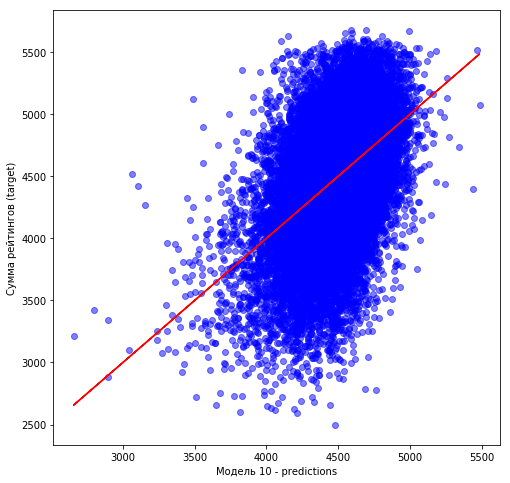

In [86]:
plt.figure(figsize=(8, 8))
plt.scatter(sum_pred,target_sum, color = 'b',alpha=0.5)
plt.xlabel('Модель 10 - predictions')
plt.ylabel('Сумма рейтингов (target)')
# Линия тренда
z = np.polyfit(sum_pred,target_sum, 1)
p = np.poly1d(z)
plt.plot(sum_pred,p(sum_pred),"r")
plt.show()

In [87]:
mae10=mae(target_sum,sum_pred)
print ('MAE = {:.3f}'.format(mae10))
rmse10 = (mse(target_sum, sum_pred))**0.5
print ('RMSE = {:.3f}'.format(rmse10))
corr_coef10 = pearsonr(target_sum,sum_pred)
print("Correlation coefficient = {:.3f}".format(corr_coef10[0]))

MAE = 342.161
RMSE = 431.050
Correlation coefficient = 0.461


In [88]:
start9 = time.time()
lr_9 = LinearRegression()
lr_9.fit(features, target_diff)
diff_pred = lr_9.predict(features)
full_time9=round(time.time() - start9,3)
print(full_time9, 'c')

0.217 c


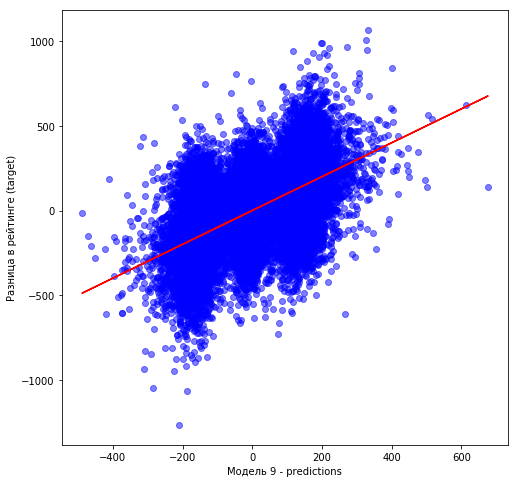

In [89]:
plt.figure(figsize=(8, 8))
plt.scatter(diff_pred,target_diff, color = 'b',alpha=0.5)
plt.xlabel('Модель 9 - predictions')
plt.ylabel('Разница в рейтинге (target)')
# Линия тренда
z = np.polyfit(diff_pred,target_diff, 1)
p = np.poly1d(z)
plt.plot(diff_pred,p(diff_pred),"r")
plt.show()

In [90]:
mae9=mae(target_diff,diff_pred)
print ('MAE = {:.3f}'.format(mae9))
rmse9 = (mse(target_diff, diff_pred))**0.5
print ('RMSE = {:.3f}'.format(rmse9))
corr_coef9 = pearsonr(target_diff,diff_pred)
print("Correlation coefficient = {:.3f}".format(corr_coef9[0]))

MAE = 150.701
RMSE = 192.272
Correlation coefficient = 0.574


In [91]:
def find_abs_error(pred,elos):
    er=0
    for ind, val in enumerate(pred):
        er+=elos.iloc[ind,0]-val[0]
        er+=elos.iloc[ind,1]-val[1]
    return round(er,5)

def find_mean_error(pred,elos):
    er=0
    count=0
    for ind, val in enumerate(pred):
        er+=elos.iloc[ind,0]-val[0]
        er+=elos.iloc[ind,1]-val[1]
        count+=2
    return round(er/count,5)

In [93]:
white_elos1 = (sum_pred + diff_pred)/2
black_elos1 = (sum_pred-diff_pred)/2
pred_elos1=list(zip(white_elos1,black_elos1))
len(pred_elos1),pred_elos1[:5]

(24255,
 [(2364.3741264853497, 2370.915906383957),
  (2159.4095888945535, 2303.5793870122093),
  (2283.705143274372, 2164.957692564116),
  (2250.18960031077, 2015.5700975836887),
  (2364.459217744196, 2354.6440159719764)])

In [94]:
find_abs_error(pred_elos1,elos),find_mean_error(pred_elos1,elos)

(0.0, 0.0)

#### Пробуем удалить незначимые по гипотезе выше признаки

In [96]:
cols_reject=[]
for ind,val in enumerate(ind_rej_sum):
    cols_reject.append(features.columns[val])

len(cols_reject),features.shape

(33, (24255, 233))

In [98]:
features_new=features.drop(columns=cols_reject,inplace=False)

In [99]:
features_new.shape

(24255, 200)

In [100]:
start10 = time.time()
lr_10 = LinearRegression()
lr_10.fit(features_new, target_sum)
sum_pred = lr_10.predict(features_new)
full_time10=round(time.time() - start10,3)
print(full_time10, 'c')

0.211 c


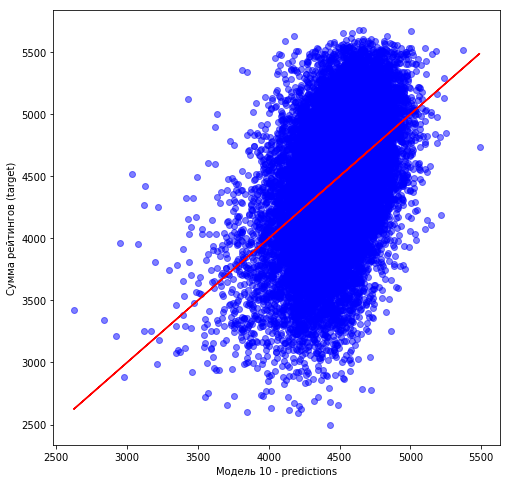

In [101]:
plt.figure(figsize=(8, 8))
plt.scatter(sum_pred,target_sum, color = 'b',alpha=0.5)
plt.xlabel('Модель 10 - predictions')
plt.ylabel('Сумма рейтингов (target)')
# Линия тренда
z = np.polyfit(sum_pred,target_sum, 1)
p = np.poly1d(z)
plt.plot(sum_pred,p(sum_pred),"r")
plt.show()

In [102]:
mae10=mae(target_sum,sum_pred)
print ('MAE = {:.3f}'.format(mae10))
rmse10 = (mse(target_sum, sum_pred))**0.5
print ('RMSE = {:.3f}'.format(rmse10))
corr_coef10 = pearsonr(target_sum,sum_pred)
print("Correlation coefficient = {:.3f}".format(corr_coef10[0]))

MAE = 344.214
RMSE = 433.726
Correlation coefficient = 0.450


In [103]:
start9 = time.time()
lr_9 = LinearRegression()
lr_9.fit(features_new, target_diff)
diff_pred = lr_9.predict(features_new)
full_time9=round(time.time() - start9,3)
print(full_time9, 'c')

0.188 c


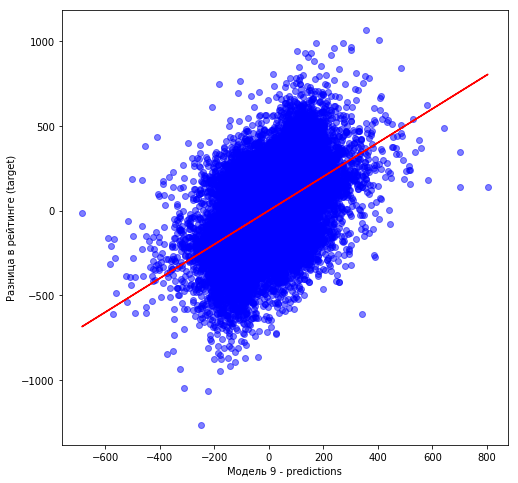

In [104]:
plt.figure(figsize=(8, 8))
plt.scatter(diff_pred,target_diff, color = 'b',alpha=0.5)
plt.xlabel('Модель 9 - predictions')
plt.ylabel('Разница в рейтинге (target)')
# Линия тренда
z = np.polyfit(diff_pred,target_diff, 1)
p = np.poly1d(z)
plt.plot(diff_pred,p(diff_pred),"r")
plt.show()

In [105]:
mae9=mae(target_diff,diff_pred)
print ('MAE = {:.3f}'.format(mae9))
rmse9 = (mse(target_diff, diff_pred))**0.5
print ('RMSE = {:.3f}'.format(rmse9))
corr_coef9 = pearsonr(target_diff,diff_pred)
print("Correlation coefficient = {:.3f}".format(corr_coef9[0]))

MAE = 159.612
RMSE = 201.730
Correlation coefficient = 0.512


In [106]:
def find_abs_error(pred,elos):
    er=0
    for ind, val in enumerate(pred):
        er+=elos.iloc[ind,0]-val[0]
        er+=elos.iloc[ind,1]-val[1]
    return round(er,5)

def find_mean_error(pred,elos):
    er=0
    count=0
    for ind, val in enumerate(pred):
        er+=elos.iloc[ind,0]-val[0]
        er+=elos.iloc[ind,1]-val[1]
        count+=2
    return round(er/count,5)

In [107]:
white_elos1 = (sum_pred + diff_pred)/2
black_elos1 = (sum_pred-diff_pred)/2
pred_elos1=list(zip(white_elos1,black_elos1))
len(pred_elos1),pred_elos1[:5]

(24255,
 [(2324.009799327124, 2389.0124107257116),
  (2108.507019362289, 2307.147170201311),
  (2233.761759169973, 2191.1738447418816),
  (2276.224624911866, 1985.9017831200663),
  (2342.8211062649984, 2371.6941982110825)])

In [108]:
find_abs_error(pred_elos1,elos),find_mean_error(pred_elos1,elos)

(0.0, 0.0)

In [26]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel_fit = sel.fit(features)
transform=sel_fit.transform(features)
features_new=pd.DataFrame(transform)
features_new.shape

(24255, 224)

In [29]:
inv_trans=sel_fit.inverse_transform(features_new)
inv_features=pd.DataFrame(inv_trans)
reject_features=inv_features.columns[(inv_features== 0).all()]
reject_features

Int64Index([183, 185, 187, 215, 225, 229, 230, 231, 232], dtype='int64')

In [32]:
for ind,val in enumerate(reject_features):
    print(features.columns[val])

NumDebBlunders
NumWhiteDebBlunders
NumBlackDebBlunders
Endk
EndK
Promotion
EnPassant
CanClaimDraw
InsufficientMaterial


### Новое:
Поиск корреляций между признаками и целевой переменной

In [45]:
from scipy.stats import pearsonr

correlations = {}

target = elos['MeanElos']
features_name=features.columns.tolist()

for f in features_name:
    data_temp = features.copy()
    data_temp['MeanElos']=target
    x1 = data_temp[f].values
    x2 = data_temp['MeanElos'].values
    key = f + ' vs ' + 'MeanElos'
    correlations[key] = pearsonr(x1,x2)[0]
    
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index].head()

C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


,Value
NumMitErrors vs MeanElos,-0.265196
LastAdvantageInd vs MeanElos,0.246657
NumBlackMitErrors vs MeanElos,-0.240913
NumWhiteMitErrors vs MeanElos,-0.234930
NumMitBlunders vs MeanElos,-0.219782


In [48]:
correlations = {}

target = elos['DiffElos']
features_name=features.columns.tolist()

for f in features_name:
    data_temp = features.copy()
    data_temp['DiffElos']=target
    x1 = data_temp[f].values
    x2 = data_temp['DiffElos'].values
    key = f + ' vs ' + 'DiffElos'
    correlations[key] = pearsonr(x1,x2)[0]
    
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index].head()

C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


,Value
Result vs DiffElos,0.546094
MeanEndScore vs DiffElos,0.391551
MeanWhiteEndScore vs DiffElos,0.386893
MeanBlackEndScore vs DiffElos,0.385615
MeanScore vs DiffElos,0.368756


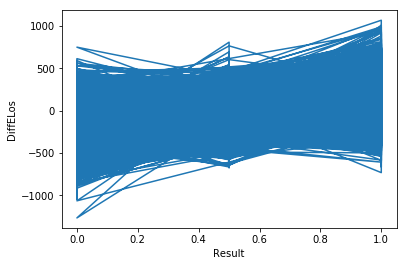

In [58]:
plt.plot(features.Result,elos['DiffElos'])
plt.xlabel('Result')
plt.ylabel('DiffELos')
plt.show()

In [49]:
correlations = {}

target = elos['SumElos']
features_name=features.columns.tolist()

for f in features_name:
    data_temp = features.copy()
    data_temp['SumElos']=target
    x1 = data_temp[f].values
    x2 = data_temp['SumElos'].values
    key = f + ' vs ' + 'SumElos'
    correlations[key] = pearsonr(x1,x2)[0]
    
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index].head()

C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


,Value
NumMitErrors vs SumElos,-0.265197
LastAdvantageInd vs SumElos,0.246662
NumBlackMitErrors vs SumElos,-0.240921
NumWhiteMitErrors vs SumElos,-0.234928
NumMitBlunders vs SumElos,-0.219781


In [50]:
correlations = {}

target = elos['WhiteElo']
features_name=features.columns.tolist()

for f in features_name:
    data_temp = features.copy()
    data_temp['WhiteElo']=target
    x1 = data_temp[f].values
    x2 = data_temp['WhiteElo'].values
    key = f + ' vs ' + 'WhiteElo'
    correlations[key] = pearsonr(x1,x2)[0]
    
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index].head()

C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


,Value
Result vs WhiteElo,0.244666
MedianBlackDeltaScore vs WhiteElo,-0.229775
NumMitErrors vs WhiteElo,-0.217271
MeanBlackMitDeltaScore vs WhiteElo,0.206191
NumWhiteMitErrors vs WhiteElo,-0.200324


In [51]:
correlations = {}

target = elos['BlackElo']
features_name=features.columns.tolist()

for f in features_name:
    data_temp = features.copy()
    data_temp['BlackElo']=target
    x1 = data_temp[f].values
    x2 = data_temp['BlackElo'].values
    key = f + ' vs ' + 'BlackElo'
    correlations[key] = pearsonr(x1,x2)[0]
    
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index].head()

C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


,Value
NumMitErrors vs BlackElo,-0.260030
MedianWhiteDeltaScore vs BlackElo,-0.248096
LastAdvantageInd vs BlackElo,0.247141
MeanWhiteMitDeltaScore vs BlackElo,-0.246326
NumBlackMitErrors vs BlackElo,-0.236171
